## Analysis of Insurance Data 

In [1]:
# Import the required packages
import numpy as np   # Provides single and multi-dimensional arrays
import pandas as pd  # Provides DataFrames for easy data manipulations and statstical functions
import matplotlib.pyplot as plt  # Provides several functions for plotting various graphs
% matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data from .csv file
data = pd.read_csv("insurance.csv")

In [3]:
# a. Shape of the data
data.shape 

# There are 1338 rows and 7 attributes

(1338, 7)

In [4]:
# b. Data type of each attribute 
data.info()

# 4 numeric and 3 string columns
# There are no missing values in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# c. Checking the presence of missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# d. 5 point summary of numerical attributes
data.describe(include='all')

# Age: Age of primary beneficiary. Ranges from 18 - 64, Mean & Median are almost same (39), indicates distribution is close to normal
# BMI: Body mass index, typically 18.5 to 24.9. Ranges from 15.96 - 53.13, Mean & Median values are almost same(30.6), indicates distribution is close to normal
# Children:  Number of children covered by health insurance. Ranges from 0 - 5 with mean=1. This can be used as a categorical-ordinal variable. Are extremes 0 & 5 outliers?
# Charges: Individual medical costs billed by health insurance. Ranges from 1121 - 63770 with mean=13270. The mean and median are not same, so distribution is skewed 

# Sex: Insurance contractor gender, mode = male at 676 count
# Smoker: Smoker/Non-smoker, mode = non-smokers at 1064 count
# Region: Beneficiary's residential area in the US, mode = southeast at 364 count 

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


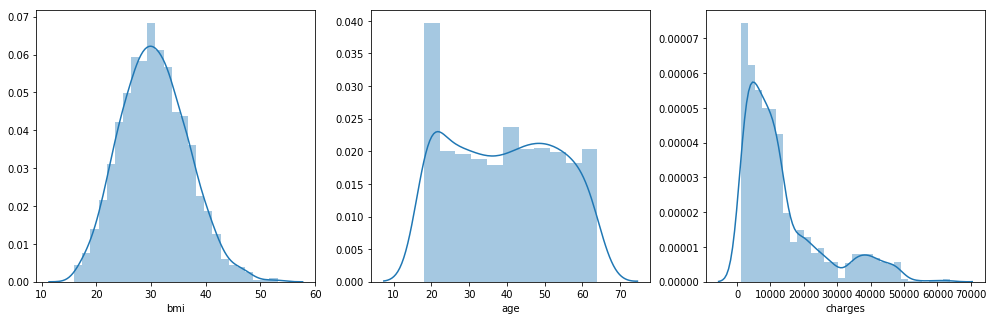

In [10]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 
plt.figure(1, figsize=(17, 5))
plt.subplot(131)
sns.distplot(data['bmi'])
plt.subplot(132)
sns.distplot(data['age'])
plt.subplot(133)
sns.distplot(data['charges'])

# The distribution for BMI is almost normal as also shown by the nearly equal Mean and Median values. Presence of some outliers indicated by the small tail.
# The distribution of Age was expected to be normal based on the proximity of mean and median, but is bi-modal
# The distribution for Charges is positively skewed

In [11]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 
data[['bmi', 'age', 'charges']].skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

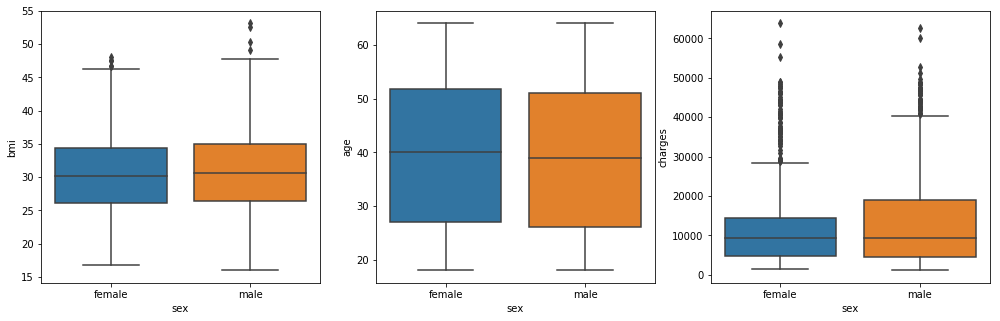

In [12]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns 
plt.figure(1, figsize=(17, 5))
plt.subplot(131)
sns.boxplot(y=data['bmi'], x=data['sex'], data=data, orient='vert') 
plt.subplot(132)
sns.boxplot(y=data['age'], x=data['sex'], data=data, orient='vert')
plt.subplot(133)
sns.boxplot(y=data['charges'], x=data['sex'], data=data, orient='vert')

# Outliers present in BMI and Charges columns
# Means of Age, BMI and Medical Charges do not differ much across male/female 

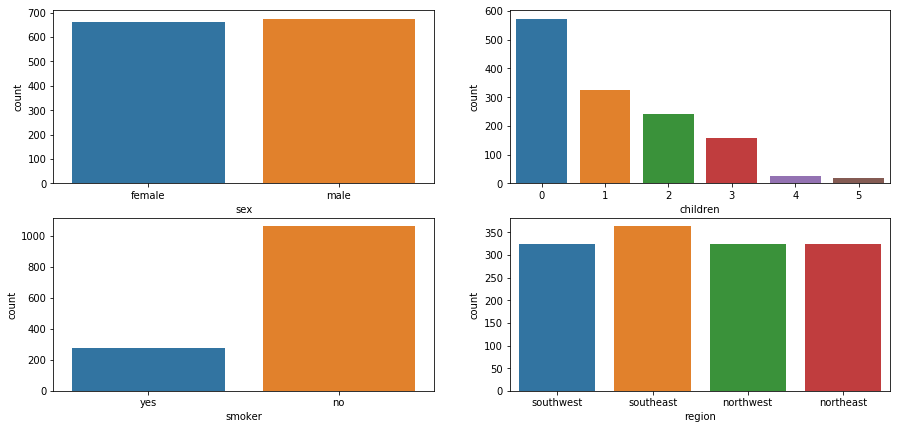

In [13]:
# h. Distribution of categorical columns (include children) 
plt.figure(1, figsize=(15, 7))
plt.subplot(221)
sns.countplot(x=data['sex'], data=data)
plt.subplot(222)
sns.countplot(x=data['children'], data=data)
plt.subplot(223)
sns.countplot(x=data['smoker'], data=data)
plt.subplot(224)
sns.countplot(x=data['region'], data=data)

# Count of Male and Female insured is almost equal
# Maximum number of insured are non-smokers
# Maximum population is from SouthEast, but not very different from other 3 areas of US

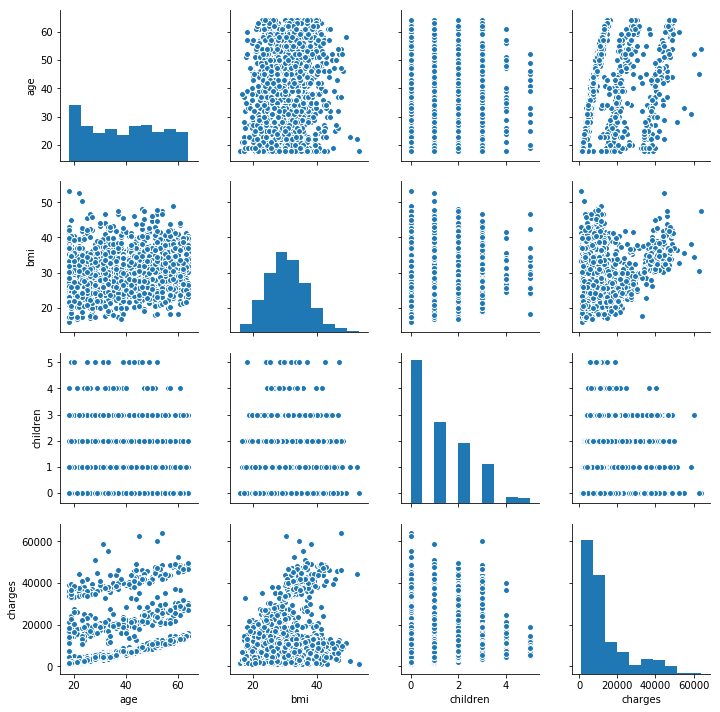

In [14]:
# i. Pair plot that includes all the columns of the data frame 
sns.pairplot(data)

# Shows clear correlation between Age and Charges. This graph shows three clearly segregated bands.

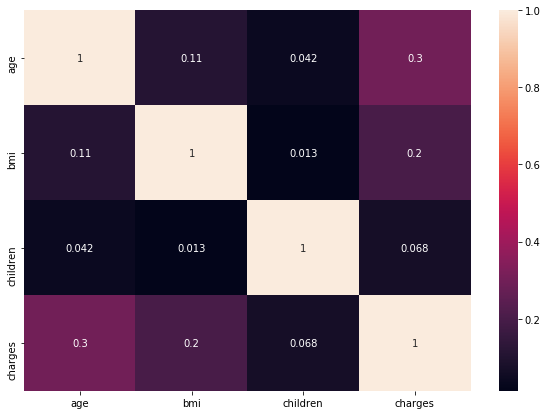

In [15]:
# Heatmap to see correlation between each column
plt.subplots(figsize = (10,7))
sns.heatmap(data.corr(), annot=True)

# Age and Charges have the highest correlation at 0.3
# Followed by BMI and Charges at 0.2
# Followed by BMI and Age at 0.11

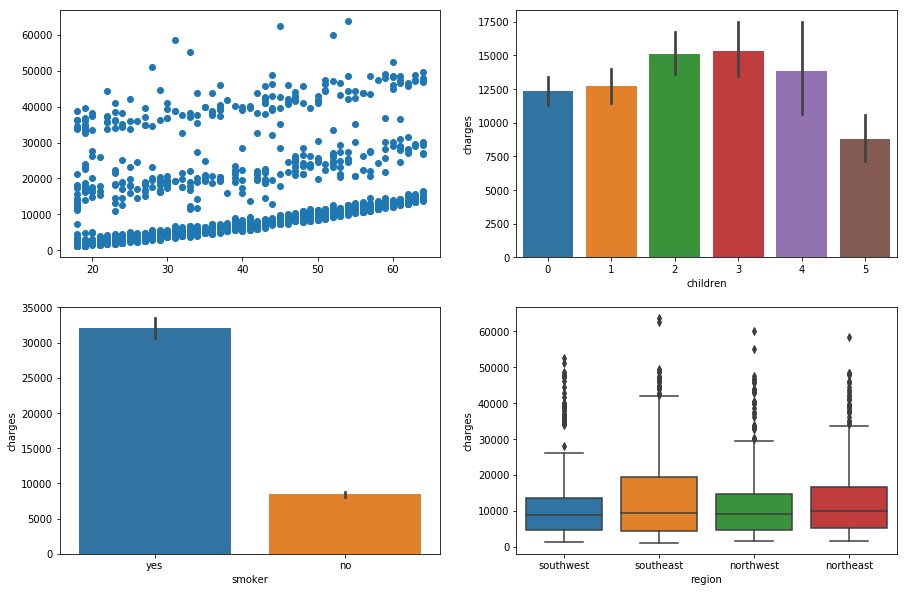

In [98]:
# Observe how Medical Charges are spread across different features
plt.figure(2, figsize=(15, 10))
plt.subplot(221)
plt.scatter(x='age', y='charges', data=data)
plt.subplot(222)
sns.barplot(x='children', y='charges', data=data)
plt.subplot(223)
sns.barplot(x='smoker', y='charges', data=data)
plt.subplot(224)
sns.boxplot(x='region', y='charges', data=data)

# Clear correlation shown between Age and Charges. This graph shows three clearly segregated bands, possibly due to HMO/PPO options

##### 4. Answer the following questions with statistical evidence

In [116]:
# Import necessary packages for Hypothesis testing
from scipy.stats import ttest_1samp, ttest_ind, wilcoxon, mannwhitneyu, shapiro, levene
from statsmodels.stats.power import Power

##### a. Do charges of people who smoke differ significantly from the people who don't? 

Avg. charges of Smokers = 32050.23183153285
Avg. charges of Non-smokers = 8434.268297856199


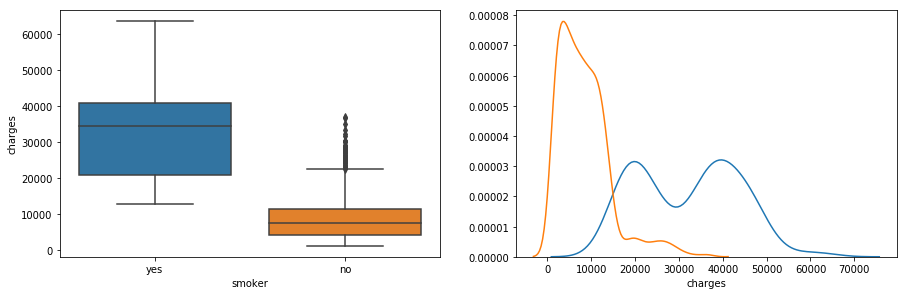

In [102]:
# T-test to check dependency of smoking on Medical charges
H0 = 'Medical Charges of smokers and non-smokers are same'  # Null Hypothesis
Ha = 'Medical Charges of smokers and non-smokers are NOT the same'  # Alternate Hypothesis
significance_level = 0.05  # Set significance level at 5%

# Get seperate samples for Smokers and Non-smokers
smokers = data[data['smoker']=='yes']['charges']
non_smokers = data[data['smoker']=='no']['charges']

plt.figure(3, figsize=(15, 10))
plt.subplot(221)
sns.boxplot(x='smoker', y='charges', data=data)
plt.subplot(222)
sns.distplot(smokers, hist=False)
sns.distplot(non_smokers, hist=False)

print('Avg. charges of Smokers =', smokers.mean())
print('Avg. charges of Non-smokers =', non_smokers.mean())

In [103]:
# Using Shapiro-Wilks test, check if both samples are normal
w_smok, p_smok = shapiro(smokers)
w_nonsmok, p_nonsmok = shapiro(non_smokers)
print('Shapiro Smokers p-value', p_smok)
print('Shapiro Non-smokers p-value', p_nonsmok)
# The shapiro test p-values for both the samples are less than 0.05.
# Hence, Reject the Shapiro H0 that the samples are normally distributed. 
# We will use the non-parametric mannwhitneyu test as the distributions are not normal

Shapiro Smokers p-value 3.6251879276250065e-09
Shapiro Non-smokers p-value 1.4455900162299346e-28


In [104]:
# Test variance using levene test
levene(smokers, non_smokers)
# Reject levene H0, that both samples are from population with equal variances

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [105]:
# Since there are 2 samples with the same test, we use the Unpaired/Independent, non-parametric testing
t_statistic, p_value = mannwhitneyu(smokers, non_smokers) # Perform Independent t-test

if p_value < significance_level:
    print('{} as p_value of {} is less than {}'.format(Ha, p_value, significance_level))
else:
    print('{} as p_value of {} is greater than {}'.format(H0, p_value, significance_level))

Medical Charges of smokers and non-smokers are NOT the same as p_value of 2.6351167222517853e-130 is less than 0.05


In [106]:
# If the sample distributions were assumed to be normal, we would use parametric testing
t_statistic, p_value = ttest_ind(smokers, non_smokers) # Perform Independent t-test

if p_value < significance_level:
    print('{} as p_value of {} is less than {}'.format(Ha, p_value, significance_level))
else:
    print('{} as p_value of {} is greater than {}'.format(H0, p_value, significance_level))

Medical Charges of smokers and non-smokers are NOT the same as p_value of 8.271435842177219e-283 is less than 0.05


##### b. Does bmi of males differ significantly from that of females? 

Avg. BMI of males = 30.943128698224832
Avg. BMI of females = 30.377749244713023


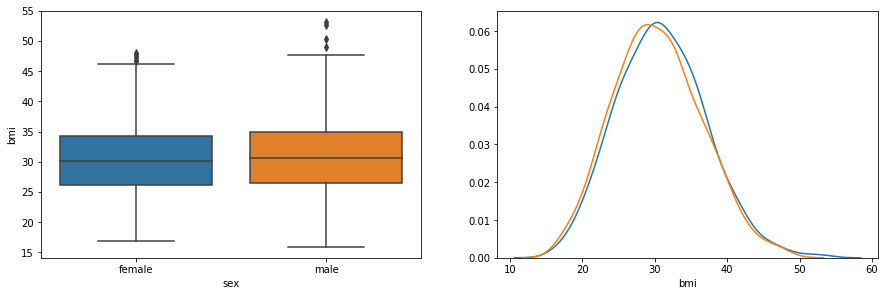

In [74]:
# T-test to check dependency of bmi on gender
H0 = 'BMI of males and females are same'  # Null Hypothesis
Ha = 'BMI of males and females are NOT the same'  # Alternate Hypothesis
significance_level = 0.05  # Set significance level at 5%

# Get seperate samples for males and females
males = data[data['sex']=='male']['bmi']
females = data[data['sex']=='female']['bmi']

plt.figure(3, figsize=(15, 10))
plt.subplot(221)
sns.boxplot(x='sex', y='bmi', data=data)
plt.subplot(222)
sns.distplot(males, hist=False)
sns.distplot(females, hist=False)

print('Avg. BMI of males =', males.mean())
print('Avg. BMI of females =', females.mean())

In [75]:
# Using Shapiro-Wilks test, check if both samples are normal
w_males, p_males = shapiro(males)
w_females, p_females = shapiro(females)
print('Shapiro males p-value', p_males)
print('Shapiro females p-value', p_females)
# The shapiro test p-values for both the samples are less than 0.05.
# Hence, Reject the Shapiro H0 that the samples are normally distributed. 
# We will use the non-parametric mannwhitneyu test as the distributions are not normal

Shapiro males p-value 0.003130641533061862
Shapiro females p-value 0.0035433683078736067


In [76]:
# Test variance using levene test
levene(males, females)
# Accept levene H0, there is high probability that both samples are from populations with equal variances

LeveneResult(statistic=0.0039394029791134, pvalue=0.949963293424026)

In [77]:
# Since there are 2 samples with the same test, we use the Unpaired/Independent, non-parametric testing
t_statistic, p_value = mannwhitneyu(males, females) # Perform Independent t-test

if p_value < significance_level:
    print('{} as p_value of {} is less than {}'.format(Ha, p_value, significance_level))
else:
    print('{} as p_value of {} is greater than {}'.format(H0, p_value, significance_level))

BMI of males and females are same as p_value of 0.05070064020142721 is greater than 0.05


In [78]:
# If the sample distributions were assumed to be normal, we would use parametric testing
t_statistic, p_value = ttest_ind(males, females) # Perform Independent t-test

if p_value < significance_level:
    print('{} as p_value of {} is less than {}'.format(Ha, p_value, significance_level))
else:
    print('{} as p_value of {} is greater than {}'.format(H0, p_value, significance_level))

BMI of males and females are same as p_value of 0.08997637178984932 is greater than 0.05


##### c. Is the proportion of smokers significantly different in different genders? 

In [21]:
from scipy.stats import chisquare, chi2_contingency

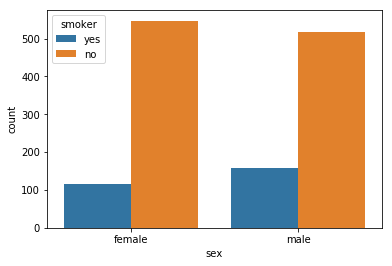

In [83]:
# To compare the significance of two Categorical Variables, we use Chi-square test
# Chi-square bivariate test to check if smokers and gender are dependent, ie the proportion of smokers varies by gender
H0 = 'The proportion of smokers is same across genders'  # Null Hypothesis
Ha = 'The proportion of smokers is DIFFERENT across genders'  # Alternate Hypothesis
significance_level = 0.05  # Set significance level at 5%

sns.countplot(x='sex', hue='smoker', data=data)

In [84]:
# Creating a contingency table
cont = pd.crosstab(data['sex'], data['smoker'])
print(cont)

# Perform Chi-square test
chi_statistic, p_value, dof, expec = chi2_contingency(cont)

if p_value < significance_level:
    print('{} as p_value of {} < {}'.format(Ha, p_value, significance_level))
else:
    print('{} as p_value of {} > {}'.format(H0, p_value, significance_level))

smoker   no  yes
sex             
female  547  115
male    517  159
The proportion of smokers is DIFFERENT across genders as p_value of 0.006548143503580696 < 0.05


##### d. Is the distribution of bmi across women with no children, one child and two children, the same? 

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

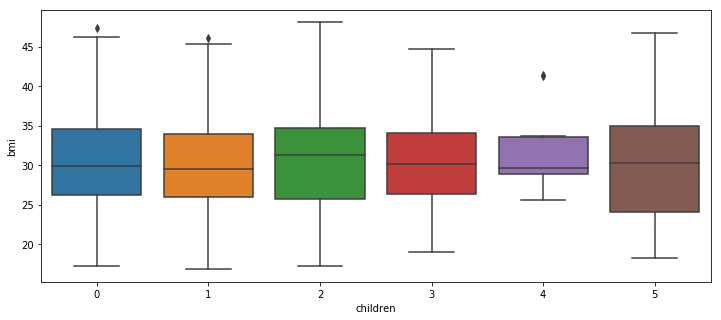

In [97]:
# ANOVA multi-variate test to check if BMI is same across women with different number of children
H0 = 'Mean BMI of women with different number of children is same'  # Null Hypothesis
Ha = 'Mean BMI of women with different number of children is NOT same'  # Alternate Hypothesis
significance_level = 0.05  # Set significance level at 5%

# Get only the data for women 
females = data[data['sex']=='female']

plt.figure(1, figsize=(12, 5))
sns.boxplot(y='bmi', x='children', data=females)

In [87]:
# Perform multi-sample ANOVA test
results = ols('bmi ~ children', data=females).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

p_value = aov_table.iloc[0, 3]
print(p_value)

if p_value < significance_level:
    print('{} as p_value of {} is less than {}'.format(Ha, p_value, significance_level))
else:
    print('{} as p_value of {} is greater than {}'.format(H0, p_value, significance_level))

0.5694130310134775
Mean BMI of women with different number of children is same as p_value of 0.5694130310134775 is greater than 0.05
